##Importing Section

In [23]:
from google.colab.patches import cv2_imshow as cv_imshow

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage # this is for the high pass filter(sharpen)

## Generating Binary, gray and BGR(colored)image

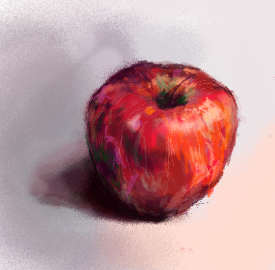

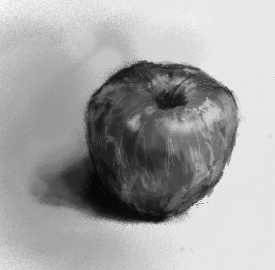

In [27]:
bgr_img = cv.imread('apple.jpg')
gray_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2GRAY)

#following code to resize, not important.
bgr_img = cv.resize(bgr_img,(0,0),fx=0.25, fy=0.25)
gray_img = cv.resize(gray_img,(0,0),fx=0.25, fy=0.25)

cv_imshow(bgr_img)
cv_imshow(gray_img)

> Converting to Binary image
  <p> in binary image, it's value range from 0 to 255

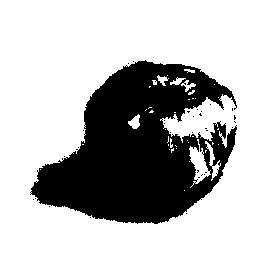

127.0

In [28]:
threshold = 127
max_value = 255
binary_threshold = cv.THRESH_BINARY

(thresh, binary_image) = cv.threshold(gray_img, threshold, max_value, binary_threshold )
cv_imshow(binary_image)

**steps**
<p>- Store the threshold in thresh variable to avoid an error
<p>- The thresh var value is 127 : below the 127 is black and above is white
<p>- 255 is the max value
<p>- Do binary conversion
<p><small>   -   The image is 1/4 sized because in the previous snippt it minimized the resoulotion of the gray image to the 1/4

## BGB to RGB

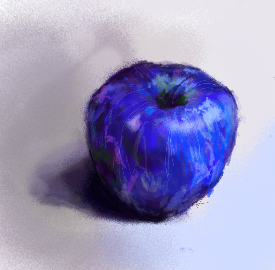

In [29]:
rbg_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
cv_imshow(rbg_img)

> this how the image sounds when you switch the channels order

## Split and Merge  rgb, bgb

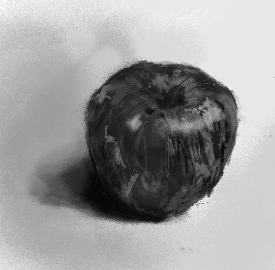

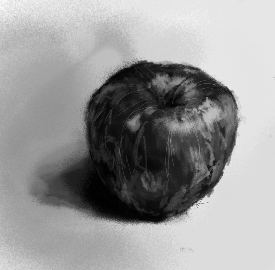

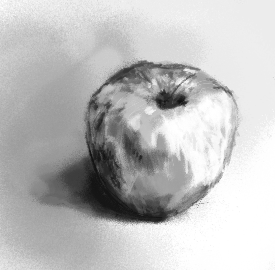

In [30]:
B,G,R = cv.split(bgr_img)
cv_imshow(B)
cv_imshow(G)
cv_imshow(R)

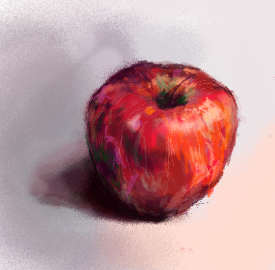

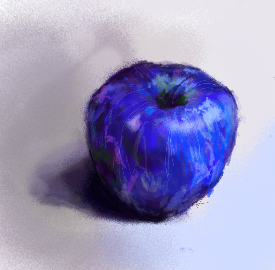

In [31]:
merged_bgr = cv.merge((B,G,R))
merged_rgb = cv.merge((R,G,B))
cv_imshow(merged_bgr)
cv_imshow(merged_rgb)

##**HSV COLOR**


> ## BGR to HSV

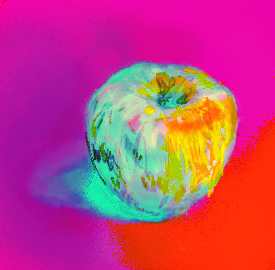

In [32]:
hsv_img = cv.cvtColor(bgr_img,cv.COLOR_BGR2HSV)
cv_imshow(hsv_img)

Hue:colors tone


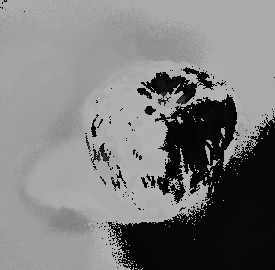

Saturation:intensity


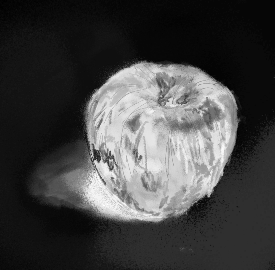

Value:brightness


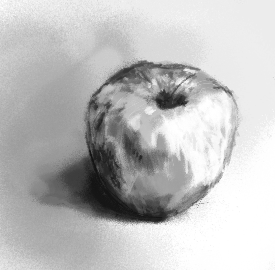

In [33]:
H = hsv_img[:,:,0]
S = hsv_img[:,:,1]
V = hsv_img[:,:,2]
print('Hue:colors tone')
cv_imshow(H)
print('Saturation:intensity')
cv_imshow(S)
print('Value:brightness')
cv_imshow(V)

Again, in the comming snippt. we van merge them back as we did before 

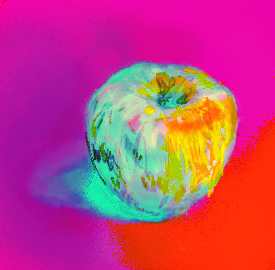

In [34]:
merged_hsv = cv.merge((H,S,V))
cv_imshow(merged_hsv)

> ## How To Pick specific color in image and show it=> HSV

**Attention**, the shape can not be done with normal image, it must be converted to one of known channel (1 channel, 3 channel different types)
<p>I'm not sure yet


> so shape line code paramters is changed


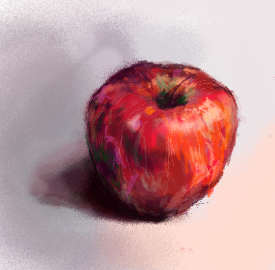

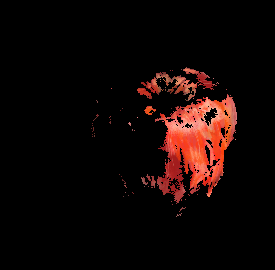

In [35]:
#orange color ranges from upper to lower
lower = np.array([0,100,100])
upper = np.array([10, 255, 255])
# show only this range
mask = cv.inRange(hsv_img,lower,upper)
#lets show this picked color
shape = cv.bitwise_and(bgr_img, bgr_img, mask=mask)
cv_imshow(bgr_img)
cv_imshow(shape)

## Resizing image

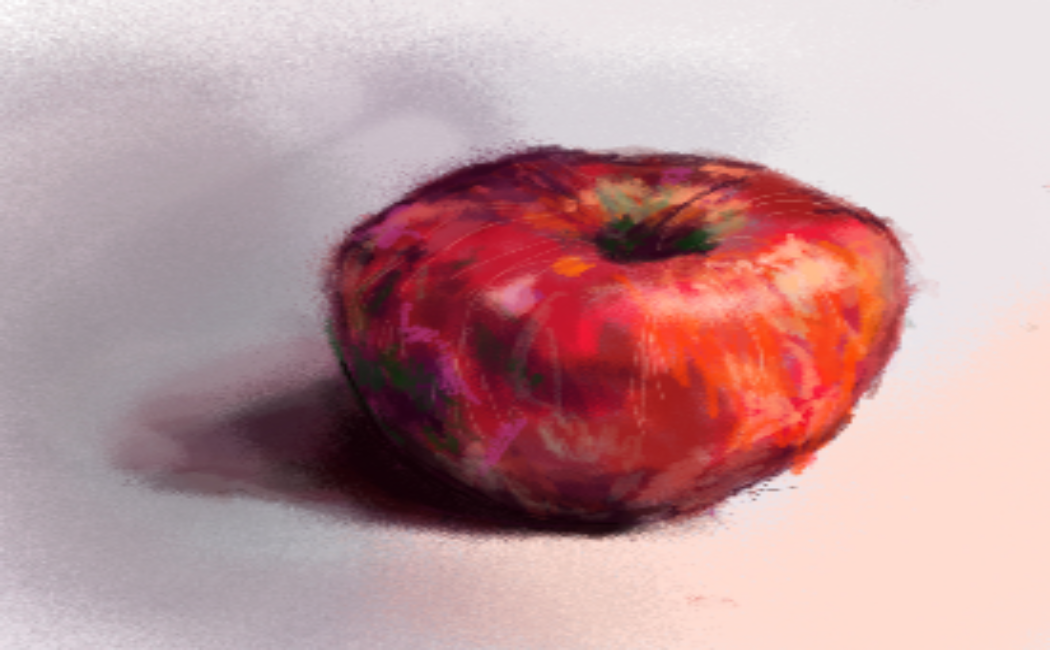

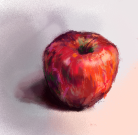

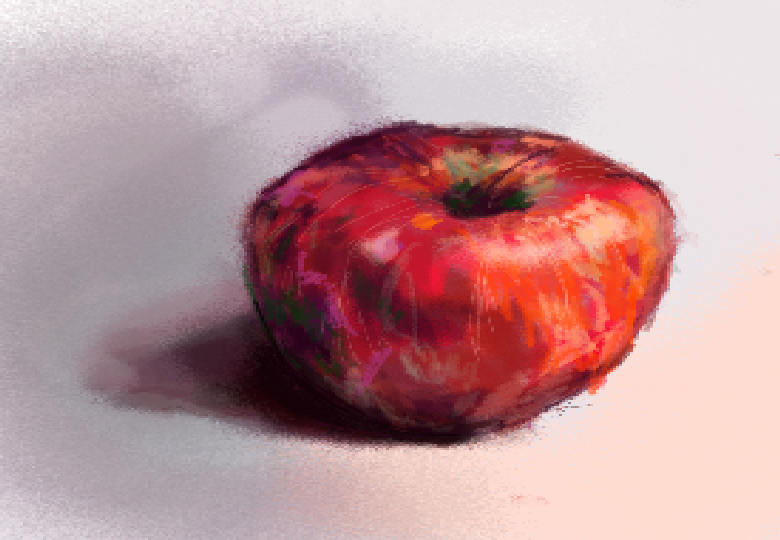

In [36]:
bigger = cv.resize(bgr_img,(1050,650))
half = cv.resize(bgr_img, (0,0), fx=0.5, fy=0.5)
streach_nearer = cv.resize(bgr_img,(780,540), interpolation=cv.INTER_NEAREST)
cv_imshow(bigger)
cv_imshow(half)
cv_imshow(streach_nearer)

* In the second line, it didn't use the second paramter, instead used the x and y axis to resize. for that, we made second paramters (0,0) cause we didnt use it</p>
<p></p><b> To change the interpolation, use this paramter</b>
<p></P>
- cv2.INTER_AREA: This is used when we need to shrink an image.


## Low pass Filter(Blur)

avrage_bLur


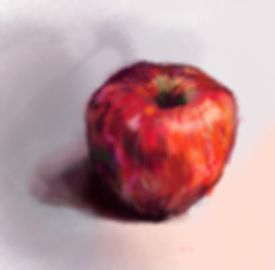

gaussian_bLur


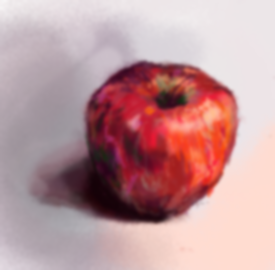

median_bLur


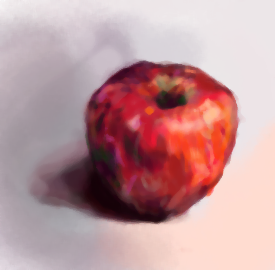

bilateral_blur


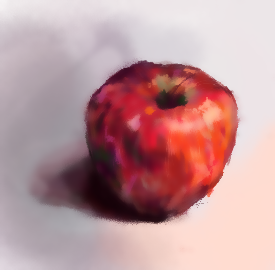

In [37]:
avrage_bLur= cv.blur(bgr_img,(5,5)) 
print('avrage_bLur')
cv_imshow(avrage_bLur)

gaussian_bLur = cv.GaussianBlur(bgr_img,(7,7),0)
print('gaussian_bLur')
cv_imshow(gaussian_bLur)

median_bLur = cv.medianBlur(bgr_img,5)
print('median_bLur')
cv_imshow(median_bLur)

bilateral_blur = cv.bilateralFilter(bgr_img, 9, 75, 75)
print('bilateral_blur')
cv_imshow(bilateral_blur)

* the second paramter is the window or kernel size in the privious snipping
* third param in the gaussian is the sigma paramter
* sec param in the median is not an winodw, its a median thing what ever
* In the bilateral third and fourth params, keep it as it is, only change the sec paaram
> the sec param is like the median's sec param concept

________________________

the coming is Bluring-smoothing filter, but instead of using built-in function, we going to define how we want the image to be blured

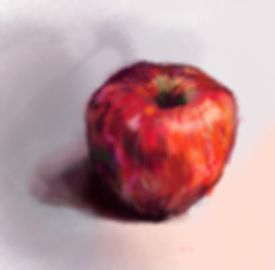

In [38]:
kernel1 = np.array( [[0.04, 0.04, 0.04, 0.04, 0.04],
                     [0.04, 0.04, 0.04, 0.04, 0.04],
                     [0.04, 0.04, 0.04, 0.04, 0.04],
                     [0.04, 0.04, 0.04, 0.04, 0.04],
                     [0.04, 0.04, 0.04, 0.04, 0.04]])
smoothed_img =cv.filter2D(bgr_img,-1,kernel1)
cv_imshow(smoothed_img)

* second paramter in the filter2d() is the depth param, set it to -1 or cv.CV64F , both values implements the image depth

## High Pass Filter

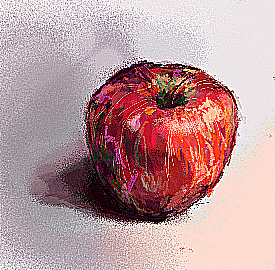

In [39]:
kernel2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
## this one generated error , RuntimeError: filter weights array has incorrect shape.
# sharped_img = ndimage.convolve(bgr_img,kernel2) 
sharpened_img = cv.filter2D(bgr_img,-1, kernel2)
cv_imshow(sharpened_img)

## EDGE DETECTION

> ### USING CUSTOM KERNEL

* most important thing in edge dedection kernel size is using odd kernel
* the kernel sum should be zero

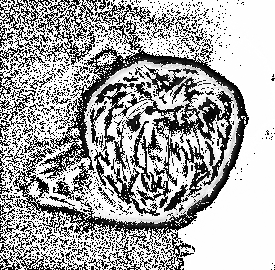

In [40]:
kernel_3x3 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, 2, 4, 2, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, -1, -1, -1, -1]])

k3 = cv.filter2D(gray_img,-1, kernel_3x3)
k5 = cv.filter2D(gray_img,-1, kernel_5x5)
blurred = cv.GaussianBlur(gray_img, (17,17), 0)
edge = (gray_img - blurred)
cv_imshow(edge)

> ### USING Ready functions



>> ## laplacine, Sobel, Scharr

In [47]:
ddepth = cv.CV_64F

laplacine_img = cv.Laplacian(gray_img,-1)
#or
sobelx = cv.Sobel(gray_img, ddepth, 1,0, ksize=5)
sobely = cv.Sobel(gray_img, ddepth, 0,1, ksize=5)
sobel_img = cv.add(sobelx,sobely)
#or
schx = cv.Scharr(gray_img, ddepth, 1,0)
schy = cv.Scharr(gray_img, ddepth, 0,1)

* cv2.Sobel(original_image, ddepth, xorder, yorder, kernelsize)
* sobel is an algorithm that dedect edges for the 2 axis, x-axis and then in y-axis:
> هو مبيعملش الا الاتنين اكسيس مع بعض, عكس الالجرويزمات التانيه بتعمل اكس مره ولو عايزه واي هديها برده تعمله
- When ddepth=CV_64F or -1, the destination image will have the same **depth** as the source image.
- The third and fourth parameters are x and y axis, so when its 1,0 then its x-axis, when it's 0,1 then its y-axis
* cv.add() -> combines the two axies togather

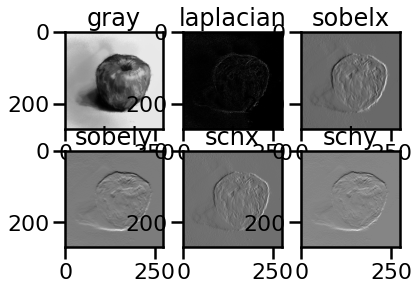

In [48]:
plt.subplot(2,3,1).imshow(gray_img, cmap='gray')
plt.title('gray')
plt.subplot(2,3,2).imshow(laplacine_img, cmap='gray')
plt.title('laplacian')
plt.subplot(2,3,3).imshow(sobelx, cmap='gray')
plt.title('sobelx')
plt.subplot(2,3,4).imshow(sobely,cmap='gray')
plt.title('sobely')
plt.subplot(2,3,5).imshow(schx ,cmap='gray')
plt.title('schx')
plt.subplot(2,3,6).imshow(schy ,cmap='gray')
plt.title('schy')
sns.set_context('poster')

>> ## Canny

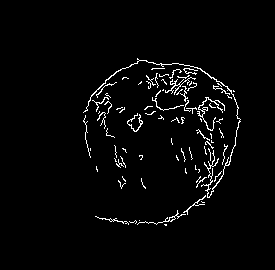

In [49]:
lower_thershold = 200
upper_threshold = 300
canny_img = cv.Canny(bgr_img, lower_thershold, upper_threshold)
cv.imwrite('canny.jpg', canny_img) #cause why not
cv_imshow(canny_img)

* sec and third params is the threshold for canny
* as it's known, canny is the best algorithm in edge dedection